# Setting Up Your Environment

First, ensure you have the necessary libraries installed. You can install them using pip:


In [1]:
!python -m pip install --upgrade pip

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load and inspect the dataset

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od

In [5]:
dataset = 'https://www.kaggle.com/datasets/girumwondemagegn/dataset-for-renewable-energy-systems'

In [6]:
od.download(dataset)

Skipping, found downloaded files in ".\dataset-for-renewable-energy-systems" (use force=True to force download)


In [7]:
import os

In [8]:
data_dir = './dataset-for-renewable-energy-systems'

In [9]:
os.listdir(data_dir)

['energy_dataset_.csv']

In [10]:
energy_df = pd.read_csv('energy_dataset_.csv')
energy_df

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,745.032555,280007.5738,230544.8268,4351.687893,90.791405,4,3.484136e+08,2,1.558508e+07,25234.911810,78.923200,1452
14996,1,15.187023,377340.5803,358547.3589,6792.194696,78.252040,4,2.560179e+08,3,6.866618e+06,15762.519790,54.982974,2598
14997,3,877.539059,480497.3920,214441.6719,4588.725297,58.282928,1,1.300112e+08,2,3.837764e+06,44597.809410,43.915897,2713
14998,7,551.264716,436383.1694,137043.8713,7251.144215,73.573666,2,3.334831e+08,2,5.347706e+06,34363.858000,4.877145,2128


In [11]:
print("Data Overview:")
print(energy_df.info())
print("\nData Summary:")
print(energy_df.describe())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   

# Check for duplicates and missing values

In [12]:
print(f"\nNumber of duplicate rows: {energy_df.duplicated().sum()}")
print(f"\nMissing values in each column:\n{energy_df.isnull().sum()}")


Number of duplicate rows: 0

Missing values in each column:
Type_of_Renewable_Energy         0
Installed_Capacity_MW            0
Energy_Production_MWh            0
Energy_Consumption_MWh           0
Energy_Storage_Capacity_MWh      0
Storage_Efficiency_Percentage    0
Grid_Integration_Level           0
Initial_Investment_USD           0
Funding_Sources                  0
Financial_Incentives_USD         0
GHG_Emission_Reduction_tCO2e     0
Air_Pollution_Reduction_Index    0
Jobs_Created                     0
dtype: int64


# Map categorical variables to more descriptive names

In [13]:
def map_column(energy_df, column, mapping):
    energy_df[column] = energy_df[column].astype(str).map(mapping)

energy_mapping = {
    '1': 'Solar',
    '2': 'Wind',
    '3': 'Hydroelectric',
    '4': 'Geothermal',
    '5': 'Biomass',
    '6': 'Tidal',
    '7': 'Wave'
}
map_column(energy_df, 'Type_of_Renewable_Energy', energy_mapping)

funding_mapping = {
    '1': 'Government',
    '2': 'Private',
    '3': 'Public-Private Partnership'
}
map_column(energy_df, 'Funding_Sources', funding_mapping)


# Function to plot pie charts for categorical distributions

In [14]:
def plot_pie_charts(data, labels, titles):
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    for i in range(2):
        ax[i].pie(data[i], labels=labels[i], autopct='%1.1f%%', startangle=140)
        ax[i].set_title(titles[i])
    plt.tight_layout()
    plt.show()

# Plot pie charts for Renewable Energy Types and Funding Sources

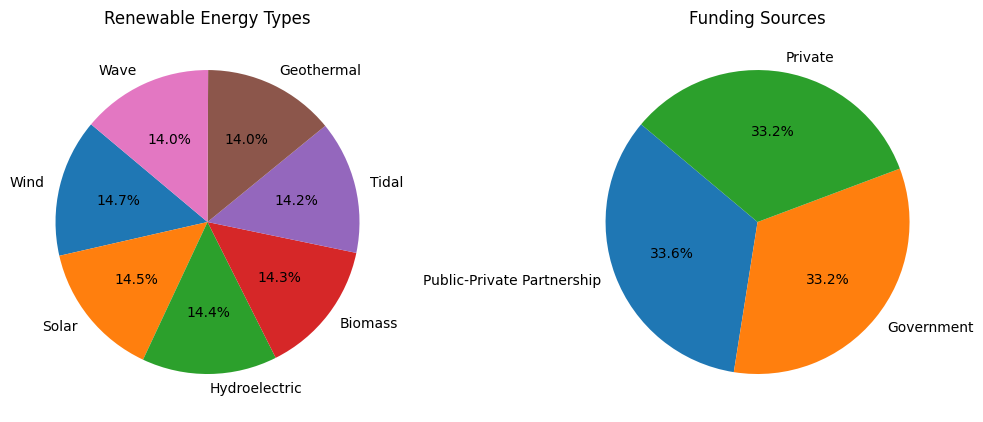

In [15]:
plot_pie_charts(
    [energy_df['Type_of_Renewable_Energy'].value_counts(), energy_df['Funding_Sources'].value_counts()],
    [energy_df['Type_of_Renewable_Energy'].value_counts().index, energy_df['Funding_Sources'].value_counts().index],
    ['Renewable Energy Types', 'Funding Sources']
)

# Function to plot bar charts for various metrics

In [16]:
def plot_metric_comparison(energy_df, metric_columns, titles, palette_list):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 17))
    
    for i, col in enumerate(metric_columns):
        plt.subplot(len(metric_columns), 1, i + 1)
        metric_energy_df = energy_df.groupby('Type_of_Renewable_Energy')[col].mean().reset_index()
        sns.barplot(x='Type_of_Renewable_Energy', y=col, data=metric_energy_df, hue='Type_of_Renewable_Energy', palette=palette_list[i])
        plt.title(titles[i])
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()



# Plot comparisons for jobs created, GHG emission reduction, and air pollution reduction

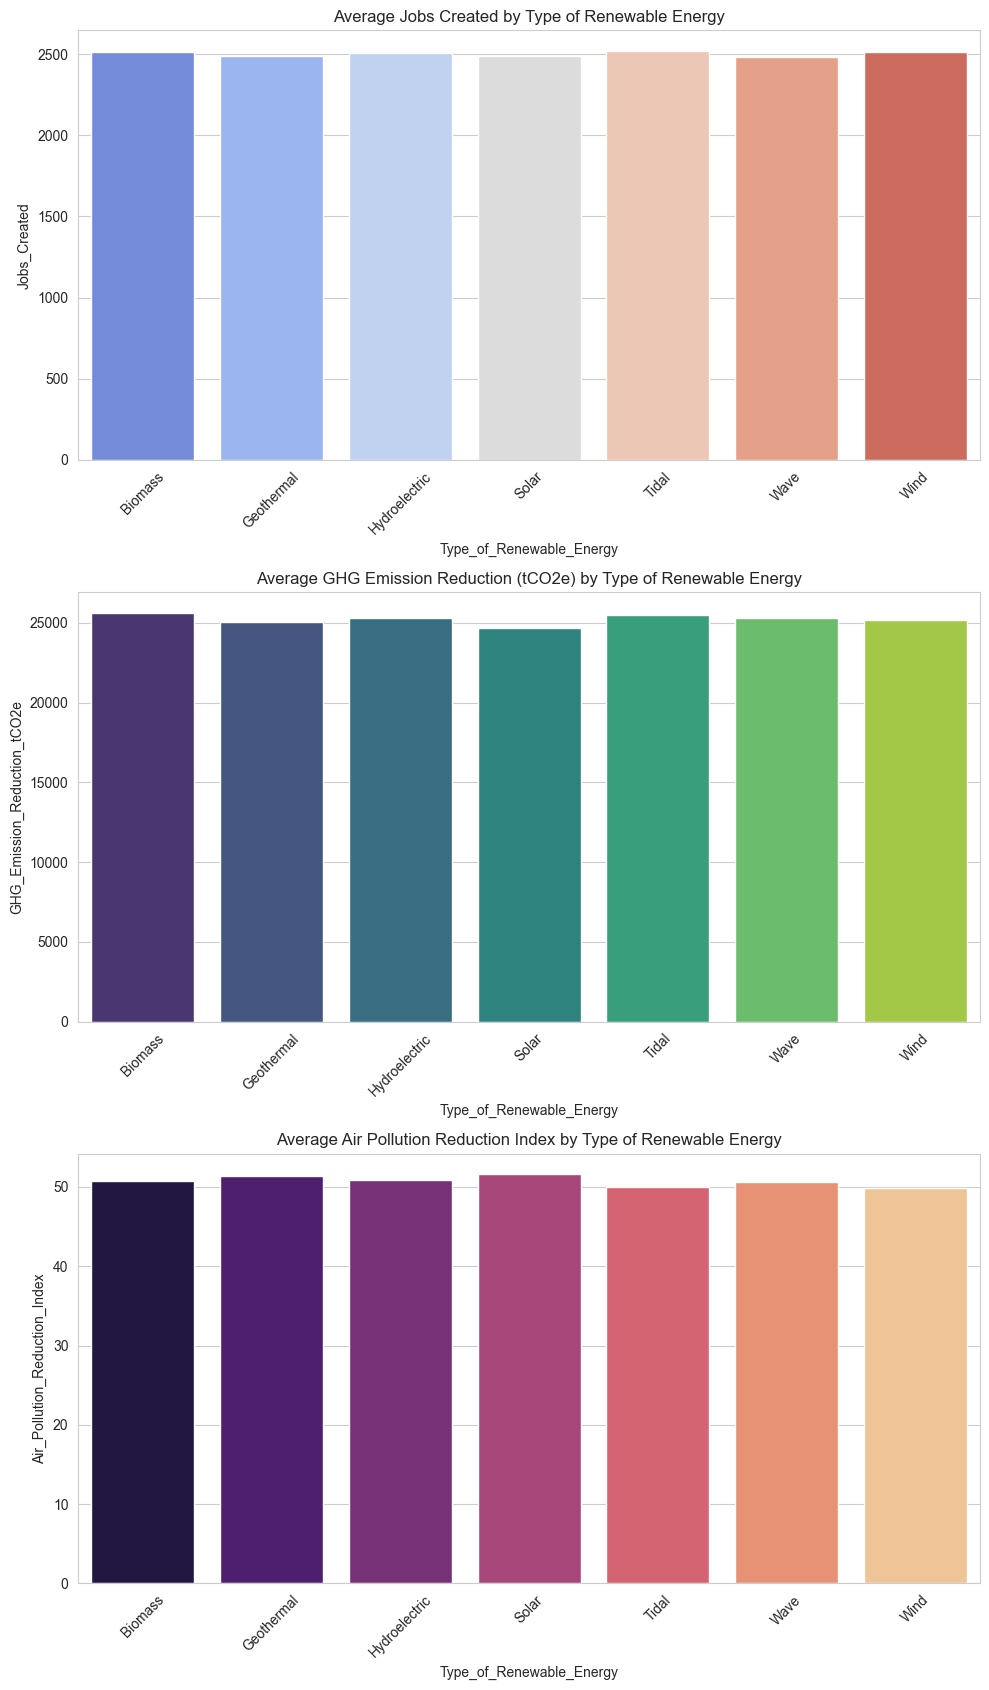

In [17]:
plot_metric_comparison(
    energy_df,
    ['Jobs_Created', 'GHG_Emission_Reduction_tCO2e', 'Air_Pollution_Reduction_Index'],
    ['Average Jobs Created by Type of Renewable Energy',
     'Average GHG Emission Reduction (tCO2e) by Type of Renewable Energy',
     'Average Air Pollution Reduction Index by Type of Renewable Energy'],
    ['coolwarm', 'viridis', 'magma']
)


# Function to plot energy metrics

In [18]:
def plot_energy_metrics(df):
    df_energy = df.groupby('Type_of_Renewable_Energy')[['Energy_Production_MWh','Energy_Consumption_MWh', 'Energy_Storage_Capacity_MWh']].mean().reset_index()
    ax = df_energy.plot(x='Type_of_Renewable_Energy', kind='bar', stacked=False, figsize=(10, 6), color=['#ff9999', '#66b3ff', '#99ff99'])
    ax.set_title('Average Energy Metrics by Type of Renewable Energy')
    ax.set_xlabel('Type of Renewable Energy')
    ax.set_ylabel('Average MWh')
    ax.legend(title='Metrics')
    plt.show()

# Plot energy metrics

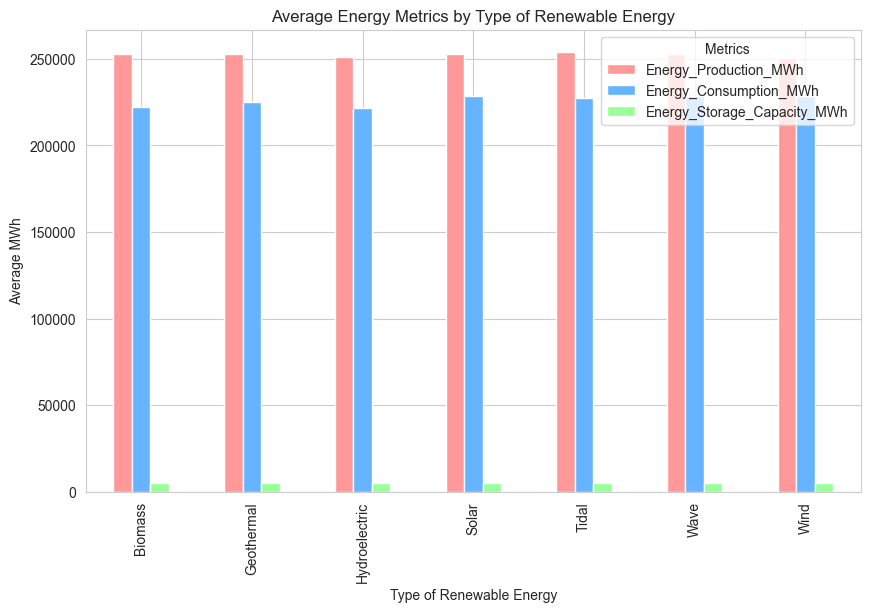

In [19]:
plot_energy_metrics(energy_df)

# Function to plot financial data

In [20]:
def plot_financial_data(energy_df, columns, titles):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(2, 1, figsize=(14, 14))
    
    for i, col in enumerate(columns):
        metric_energy_df = energy_df.groupby('Type_of_Renewable_Energy')[col].mean().reset_index()
        sns.barplot(x=col, y='Type_of_Renewable_Energy', data=metric_energy_df, ax=ax[i], hue='Type_of_Renewable_Energy', palette='viridis')
        ax[i].set_title(titles[i])
        ax[i].set_xlabel('Average Amount (USD)')
        ax[i].set_ylabel('Type of Renewable Energy')
        ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()


# Plot initial investment and financial incentives

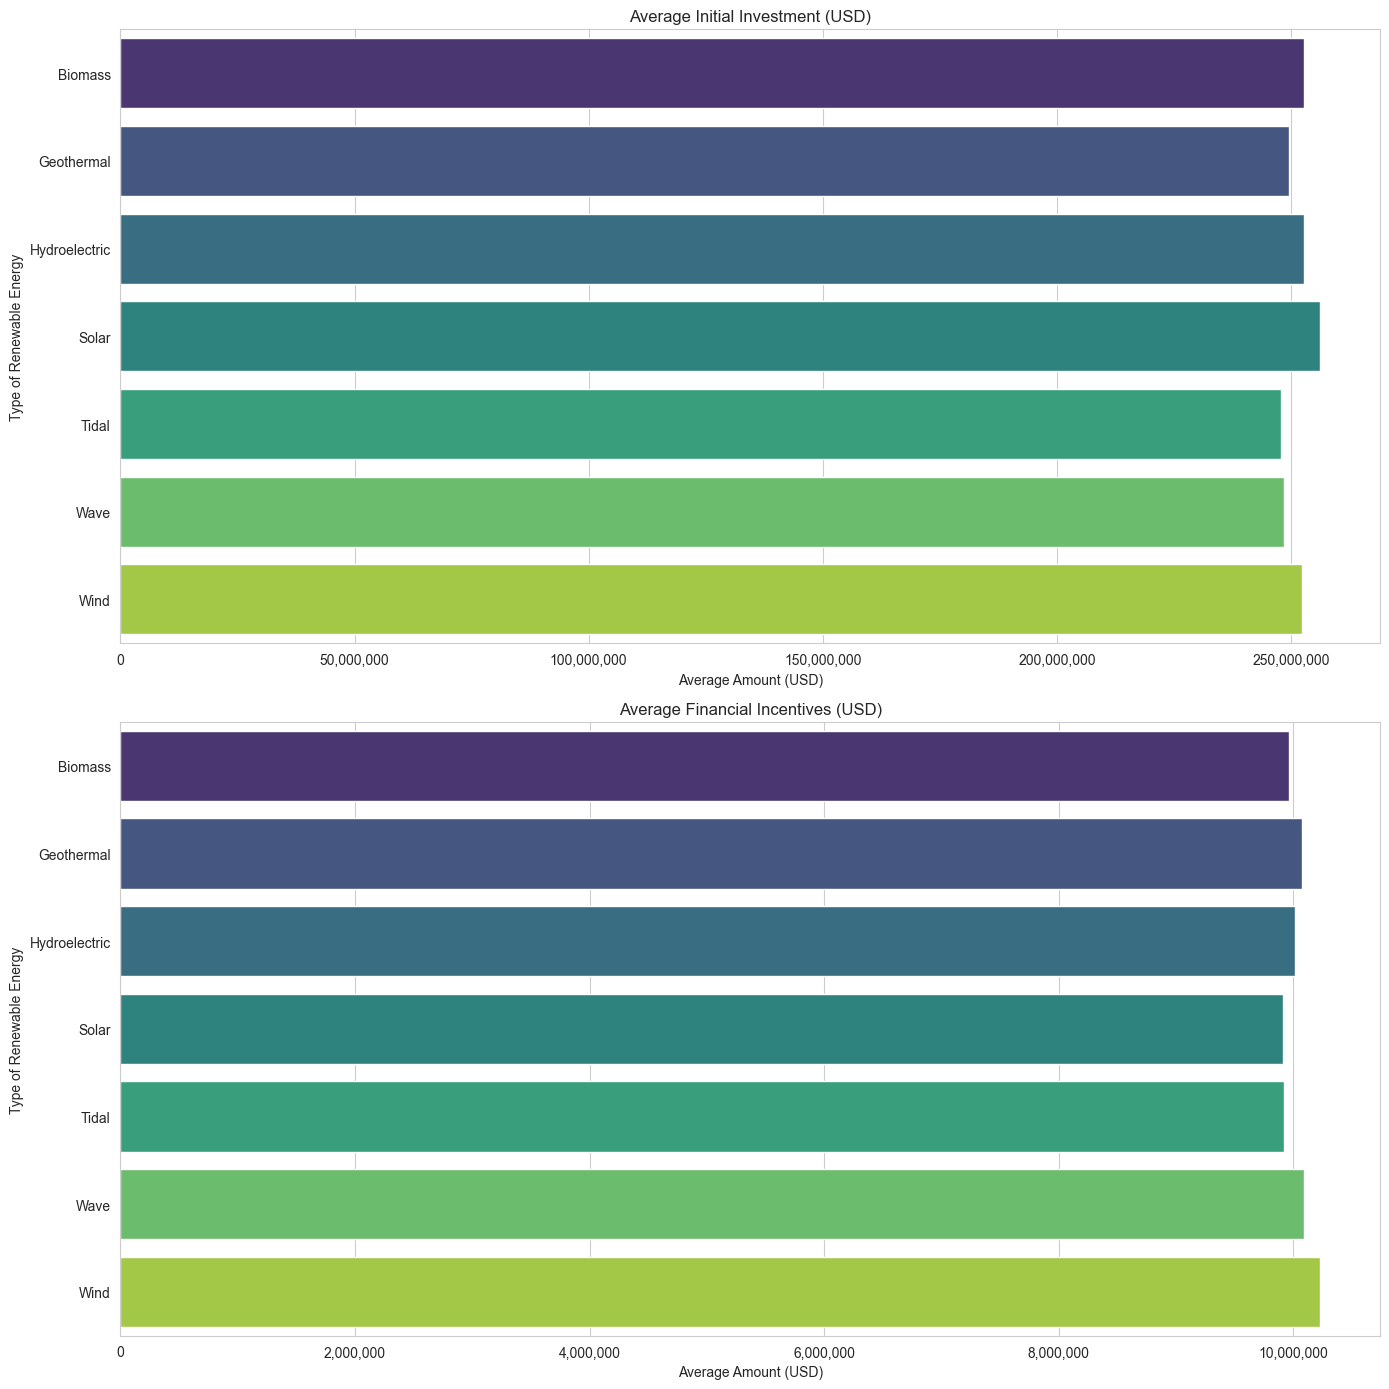

In [21]:
plot_financial_data(
    energy_df,
    ['Initial_Investment_USD', 'Financial_Incentives_USD'],
    ['Average Initial Investment (USD)', 'Average Financial Incentives (USD)']
)

Detailed Findings from the Renewable Energy Data Analysis

1. Distribution of Renewable Energy Types:
        
Prevalence: Wind energy emerges as the most widely adopted renewable energy source, slightly ahead of Solar energy, reflecting their growing accessibility, declining costs, and technological advancements. Hydroelectric power also maintains a strong presence.
        
Emerging Technologies: Tidal and Wave energy technologies are less represented in the dataset, indicating they are still in the early stages of adoption. However, they show potential for growth in coastal areas with abundant resources. Geothermal energy is similarly less prevalent, largely concentrated in regions with significant geothermal activity.

2. Funding Sources:

Government Funding: A substantial portion of renewable energy projects is financed through government funding (4,982 projects), highlighting the critical role of public sector support in driving the transition to renewable energy. This funding helps de-risk investments and encourages the adoption of cleaner energy technologies.
        
Private Sector Participation: Private funding (4,976 projects), although slightly less than government funding, plays a crucial role in accelerating innovation and scaling up renewable energy projects. Public-Private Partnerships (PPPs) are the most common funding source (5,042 projects), indicating significant collaboration between the public and private sectors to leverage resources and expertise.

3. Impact on Employment:

Job Creation: Tidal energy projects lead in job creation with the highest average jobs created per project. This is likely due to the labor-intensive nature of managing tidal energy infrastructure. Biomass and Wind energy projects also generate substantial employment, especially in the manufacturing, installation, and maintenance of turbines and biomass processing.
        
Sectoral Comparison: While Solar energy is widely adopted, it creates fewer jobs per unit compared to Biomass and Wind due to advancements in solar technology that reduce the need for manual labor in installation and maintenance.

4. Environmental Benefits:

GHG Emission Reduction: Biomass, Tidal, and Hydroelectric energy projects show the highest average greenhouse gas (GHG) emission reductions, highlighting their effectiveness in displacing fossil fuels and contributing to climate change mitigation. Wind energy is also effective, further supporting its role in achieving climate targets.
        
Air Pollution Reduction: Solar and Geothermal projects have the highest average air pollution reduction index, demonstrating their impact in reducing pollutants that affect air quality. Hydroelectric projects also significantly contribute to air pollution reduction, which can be attributed to their ability to replace fossil-fuel-based power generation.

5. Energy Production and Consumption:

High Energy Production: Hydroelectric projects show the highest average energy production, often due to their large scale and consistent energy output from water flow. Wind energy also shows high production levels, particularly in regions with strong wind resources.

Energy Storage: Solar and Biomass projects exhibit moderate energy storage capacities, reflecting ongoing investments in battery and other storage technologies to ensure a stable energy supply despite the intermittency of these sources.

6. Financial Insights:

Initial Investment Requirements: Solar projects require the highest initial investments, reflecting the significant upfront costs associated with infrastructure development. Geothermal and Biomass projects also require substantial investment, highlighting the need for substantial financial resources or incentives to make these projects more viable.
        
Financial Incentives: Wind and Wave projects benefit the most from financial incentives, which could include tax credits, grants, or subsidies. These incentives are crucial in reducing the cost of renewable energy projects and making them competitive with conventional energy sources.

Conclusion

The analysis reveals a diverse landscape of renewable energy sources, each with its unique advantages and challenges. Wind and Solar energy are at the forefront of adoption, driven by a combination of government funding, private sector innovation, and financial incentives. Biomass and Hydroelectric energy contribute significantly to job creation and environmental benefits, while emerging technologies like Tidal, Wave, and Geothermal hold promise for future expansion. Financial incentives play a pivotal role in enabling the growth of renewable energy, particularly in overcoming the high initial costs associated with some technologies.

These findings provide valuable insights for policymakers, investors, and stakeholders in the renewable energy sector, guiding decisions on where to allocate resources, which technologies to prioritize, and how to maximize environmental and economic benefits.